# HW 3

In [20]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from numpy import random 
import matplotlib.pyplot as plt
import sklearn
from tqdm import tqdm
import time
import seaborn as sns
%matplotlib inline

## Question (a)

In [2]:
# load the data
devX = pd.read_csv('datasets-forrelease/devX-3d.csv', header = None, sep = '\t')
devY = pd.read_csv('datasets-forrelease/devY-3d.csv', header = None, sep = '\t')
trnX = pd.read_csv('datasets-forrelease/trnX-3d.csv', header = None, sep = '\t')
trnY = pd.read_csv('datasets-forrelease/trnY-3d.csv', header = None, sep = '\t')
testX = pd.read_csv('datasets-forrelease/tstX-3d.csv', header = None, sep = '\t')

In [180]:
trnY = np.ravel(trnY);

In [181]:
clftrn = MLPClassifier().fit(trnX, trnY)

In [182]:
trn_yhat = clftrn.predict(trnX)

In [183]:
accuracy_score(trnY, trn_yhat)

0.802880658436214

# training accuracy = 80.29%

In [184]:
dev_yhat = clftrn.predict(devX)

In [185]:
accuracy_score(devY, dev_yhat)

0.8074074074074075

# development accuracy = 80.74%

## Question (b)

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
# previous runs have indicated adam is the better solver 

params = [{'hidden_layer_sizes' : [10, 25, 50, 100, 200],
           'activation':['logistic', 'tanh', 'relu'],
           'solver': ['adam'],
          'learning_rate_init': [0.001, 0.01, 0.05, 0.1],
          'batch_size' : [25, 50, 100, 200, 500]}]

In [11]:
clf_gs = MLPClassifier()

In [12]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [13]:
t = time.time()

gs_clf = GridSearchCV(estimator = clf_gs,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5,
                     verbose = 1)
gs_clf.fit(trnX, trnY)

elapsed = time.time() - t
print('The Best parameters are: ', gs_clf.best_params_)
print('The optimal parameters were found in :', elapsed, ' seconds')


Fitting 5 folds for each of 300 candidates, totalling 1500 fits
The Best parameters are:  {'activation': 'logistic', 'batch_size': 50, 'hidden_layer_sizes': 100, 'learning_rate_init': 0.05, 'solver': 'adam'}
The optimal parameters were found in : 2190.837883234024  seconds


In [53]:
activation = gs_clf.cv_results_['param_activation']
layers = gs_clf.cv_results_['param_hidden_layer_sizes']
lr = gs_clf.cv_results_['param_learning_rate_init']
bs = gs_clf.cv_results_['param_batch_size']

In [55]:
log = activation == 'logistic'
relu = activation == 'relu'
tanh = activation == 'tanh'
layer10  = layers == 10
layer25  = layers == 25
layer50  = layers == 50
layer100 = layers == 100
layer200 = layers == 200
lr1 = lr == 0.001
lr2 = lr == 0.01
lr3 = lr == 0.05
lr4 = lr == 0.1
bs25  = bs == 25
bs50  = bs == 50
bs100 = bs == 100
bs200 = bs == 200
bs500 = bs == 500

In [51]:
print('The average rank of a model with a Relu activation function was: ', np.mean(rankings[relu]))
print('The average rank of a model with a tanh activation function was: ', np.mean(rankings[tanh]))
print('The average rank of a model with a logistic activation function was: ', np.mean(rankings[log]))
print('tanh seems to be the better activation function')

The average rank of a model with a Relu activation function was:  177.22
The average rank of a model with a tanh activation function was:  130.95
The average rank of a model with a logistic activation function was:  142.08
tanh seems to be the better activation function


In [59]:
print('The average rank of a model with 10 hidden layer swas: ', np.mean(rankings[layer10]))
print('The average rank of a model with 25 hidden layers was: ', np.mean(rankings[layer25]))
print('The average rank of a model with 50 hidden layers was: ', np.mean(rankings[layer50]))
print('The average rank of a model with 100 hidden layers was: ', np.mean(rankings[layer100]))
print('The average rank of a model with 200 hidden layers was: ', np.mean(rankings[layer200]))
print('It seems the optimal number of layers is between 25 and 100')

The average rank of a model with 10 hidden layer swas:  201.83333333333334
The average rank of a model with 25 hidden layers was:  143.86666666666667
The average rank of a model with 50 hidden layers was:  129.03333333333333
The average rank of a model with 100 hidden layers was:  129.8
The average rank of a model with 200 hidden layers was:  145.88333333333333
It seems the optimal number of layers is between 25 and 100


In [60]:
print('The average rank of a model with a initial learning rate of 0.001 was: ', np.mean(rankings[lr1]))
print('The average rank of a model with a initial learning rate of 0.01 was: ', np.mean(rankings[lr2]))
print('The average rank of a model with a initial learning rate of 0.05 was: ', np.mean(rankings[lr3]))
print('The average rank of a model with a initial learning rate of 0.1 was: ', np.mean(rankings[lr4]))
print('0.05 seems to be the better initial learning rate')

The average rank of a model with a initial learning rate of 0.001 was:  236.64
The average rank of a model with a initial learning rate of 0.01 was:  121.52
The average rank of a model with a initial learning rate of 0.05 was:  111.56
The average rank of a model with a initial learning rate of 0.1 was:  130.61333333333334
0.05 seems to be the better initial learning rate


In [58]:
print('The average rank of a model with a batch size of 25 was: ', np.mean(rankings[bs25]))
print('The average rank of a model with a batch size of 50 was: ',  np.mean(rankings[bs50]))
print('The average rank of a model with a batch size of 100 was: ',  np.mean(rankings[bs100]))
print('The average rank of a model with a batch size of 200 was: ',  np.mean(rankings[bs200]))
print('The average rank of a model with a batch size of 500 was: ',  np.mean(rankings[bs500]))
print('Batch size seems to be less influential than other parameters')

The average rank of a model with a batch size of 25 was:  154.05
The average rank of a model with a batch size of 50 was:  149.88333333333333
The average rank of a model with a batch size of 100 was:  143.78333333333333
The average rank of a model with a batch size of 200 was:  147.7
The average rank of a model with a batch size of 500 was:  155.0
Batch size seems to be less influential than other parameters


### Lets check hidden layer size and batch size

In [70]:
params3 = [{'hidden_layer_sizes' : [80,90,100,110,120],
          'batch_size' : [40,60,80,100]}]

clf_gs = MLPClassifier(activation = 'tanh', solver= 'adam', learning_rate_init = 0.05)

In [71]:
t = time.time()

gs_clf3 = GridSearchCV(estimator = clf_gs,
                      param_grid=params3,
                      scoring='accuracy',
                      cv=5,
                     verbose = 1)
gs_clf3.fit(trnX, trnY)

elapsed = time.time() - t
print('The best parameters found are: ', gs_clf3.best_params_)
print('The optimal parameters were found in :', elapsed, ' seconds')


Fitting 5 folds for each of 20 candidates, totalling 100 fits
The best parameters found are:  {'batch_size': 100, 'hidden_layer_sizes': 120}
The optimal parameters were found in : 84.27157711982727  seconds


In [73]:
bs = gs_clf3.cv_results_['param_batch_size']
layers = gs_clf3.cv_results_['param_hidden_layer_sizes']

In [80]:
layer80 = layers == 80
layer90  = layers == 90
layer100  = layers == 100
layer110 = layers == 110
layer120 = layers == 120
bs40  = bs == 40
bs60  = bs == 60
bs80 = bs == 80
bs100 = bs == 100

In [103]:
scores = list(gs_clf3.cv_results_['mean_test_score'])
layer_num = list(gs_clf3.cv_results_['param_hidden_layer_sizes'].data)
batch_num = list(gs_clf3.cv_results_['param_batch_size'].data)

In [108]:
heatmap = pd.DataFrame()
heatmap['accuracy'] = scores
heatmap['layer_num'] = layer_num
heatmap['batch_num'] = batch_num

In [121]:
heatmap = pd.pivot(heatmap, values =  'accuracy', index = 'batch_num', columns = 'layer_num')

<AxesSubplot:xlabel='layer_num', ylabel='batch_num'>

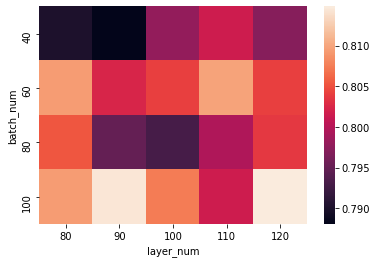

In [122]:
sns.heatmap(heatmap)

## keep checking

In [158]:
params4 = [{'hidden_layer_sizes' : [85,95,105,115,125,135],
          'batch_size' : [100, 120, 140,160, 180]}]

clf_gs = MLPClassifier(activation = 'tanh', solver= 'adam', learning_rate_init = 0.05)

In [159]:
t = time.time()

gs_clf4 = GridSearchCV(estimator = clf_gs,
                      param_grid=params4,
                      scoring='accuracy',
                      cv=5,
                     verbose = 1)
gs_clf4.fit(trnX, trnY)

elapsed = time.time() - t
print('The best parameters found are: ', gs_clf4.best_params_)
print('The optimal parameters were found in :', elapsed, ' seconds')


Fitting 5 folds for each of 30 candidates, totalling 150 fits
The best parameters found are:  {'batch_size': 180, 'hidden_layer_sizes': 85}
The optimal parameters were found in : 149.88285994529724  seconds


In [160]:
bs = gs_clf4.cv_results_['param_batch_size']
layers = gs_clf4.cv_results_['param_hidden_layer_sizes']

In [162]:
scores = list(gs_clf4.cv_results_['mean_test_score'])
layer_num = list(gs_clf4.cv_results_['param_hidden_layer_sizes'].data)
batch_num = list(gs_clf4.cv_results_['param_batch_size'].data)
heatmap = pd.DataFrame()
heatmap['accuracy'] = scores
heatmap['layer_num'] = layer_num
heatmap['batch_num'] = batch_num
heatmap = pd.pivot(heatmap, values = 'accuracy', index = 'batch_num', columns = 'layer_num')

<AxesSubplot:xlabel='layer_num', ylabel='batch_num'>

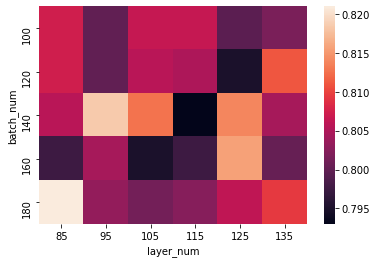

In [165]:
sns.heatmap(heatmap)

# This seems to be about as good as it gets, but it also seems as though there is quite a bit variability for parameters, I will go with 180 as batch size and 85 hidden layers

In [166]:
clf_best = MLPClassifier(activation = 'tanh', batch_size= 180, hidden_layer_sizes= 85, learning_rate_init= 0.05, solver= 'adam')

In [167]:
clf_best.fit(trnX, trnY)

MLPClassifier(activation='tanh', batch_size=180, hidden_layer_sizes=85,
              learning_rate_init=0.05)

In [168]:
best_train_pred = clf_best.predict(trnX)

In [177]:
accuracy_score(trnY, best_train_pred)

0.8296296296296296

In [178]:
best_pred = clf_best.predict(devX)

In [179]:
accuracy_score(devY, best_pred)

0.8296296296296296

# Best development accuracy: 82.96%

# hyperparameters chosen: activation = tanh, batch size = 180, hidden layer sizes= 85, learning rate init= 0.05, solver= adam

# Difference between best accuracy from tuned parameters and default parameters: 82.96% - 80.74% = 2.22% improvement 